In [ ]:
import math
import random

import matplotlib.pyplot as plot
import scipy.special as scip

%matplotlib inline

def help15(x, y, n_):
    return (0.5 * math.erf(0.707107 * (y + x)) - (math.erf(0.707107 * y))) ** (n_ - 1) * math.exp(
        -0.5 * y * y) / math.sqrt(2 * math.pi)


def integral15(a, b, acc, x, n_):
    acc_ = acc * 2
    z = 4
    s = help15(a, x, n_) * help15(b, x, n_)
    h = (b - a) / acc_
    i = 0
    while i <= acc_:
        s = s + z * help15(a + i * h, x, n_)
        z = 6 - z
        i = i + 1
    return s * h / 3


def range_(accuracy_, x, n_):
    return n * integral15(-5.0, 5.0, accuracy_, x, n_)


accuracy = 5
n = 100
k = 100000

data_x = []
data_y = []
for i in range(58, 181):
    data_x.append(i / 20.0)
    data_y.append(range_(accuracy, data_x[-1], n) / 7e16 / 2.7100012860423055)
plot.title("Теоретическая функция распределения размаха")
plot.xlabel("x")
plot.ylabel("P")
plot.plot(data_x, data_y)
plot.show()

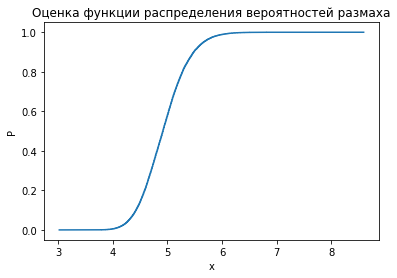

In [30]:
range_list = []  #лист размахов
for i in range(1, k + 1):
    exp = []
    for j in range(1, n + 1):
        exp.append(math.sqrt(2.0) * scip.erfinv(-1 + 2 * random.random()))
    range_list.append(max(exp) - min(exp))
for i in range(len(range_list)):
    range_list[i] = int(range_list[i] * (10 ** 2)) / (10.0 ** 2)

sorted_range = sorted(range_list)
count = [float(range_list.count(sorted_range[i])) for i in range(len(sorted_range))]

s = sum(count)
probs = [i / s for i in count]

distribution = [0.0 for i in probs]

for i in range(len(probs)):
    for j in range(i):
        distribution[i] = distribution[i] + probs[j]

plot.title("Оценка функции распределения вероятностей размаха")
plot.xlabel("x")
plot.ylabel("P")
plot.plot(sorted_range, distribution)
